# Analytic Geometry

* The Dot Product

* The Norm of a Vector

* Distance in $\mathbb{R}^n$

* Orthogonal Vectors

* Orthogonal Projection

* Rotations

## The Dot Product

Consider two vectors

$$\large 
\mathbf{u}=\left[\begin{array}{l}
u_{1} \\
u_{2} \\
\vdots \\
u_{n}
\end{array}\right] \quad \text { and } \bf{v}=\left[\begin{array}{l}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array}\right]
$$

The dot product of $\mathbf{u}$ and $\mathbf{v}$,i.e. $\mathbf{u}\cdot\mathbf{v}$ is defined as

$$\large
\left[\begin{array}{llll}
u_{1} & u_{2} & \cdots & u_{n}
\end{array}\right]\left[\begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array}\right]=u_{1} v_{1}+u_{2} v_{2}+\cdots+u_{n} v_{n}
$$

### Dot product in numpy

In [67]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import scipy.spatial
import numpy.linalg as LA

In [68]:
u = np.round(100*np.random.randn(10))
v = np.round(100*np.random.randn(10))

* element-wise multiplication

In [69]:
u*v 

array([  3213.,   1568.,   -153., -14342.,  12120.,  -7747.,   4788.,
         -148., -27072.,   8217.])

* matrix multiplication

In [70]:
u@v 

-19556.0

* inner product here is the same as matrix multiplication

In [71]:
np.inner(u,v) 

-19556.0

* NumPy with the dot function

In [72]:
np.dot(u, v)

-19556.0

* Equivalently, you can use the dot method of ndarrays:

In [73]:
u.dot(v)

-19556.0

### Main properties
* The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
* The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.
* This also means that the dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined.
* However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Finally, the dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

## The Norm of a Vector

The <font face="gotham" color="red">norm</font> is the length of a vector, definted by

$$\large 
\|\mathbf{v}\|=\sqrt{\mathbf{v} \cdot \mathbf{v}}=\sqrt{v_{1}^{2}+v_{2}^{2}+\cdots+v_{n}^{2}}, \quad \text { and } \quad\|\mathbf{v}\|^{2}=\mathbf{v} \cdot \mathbf{v}
$$

* A NumPy built-in ```np.linalg.norm()``` is for computing norms.
* The default setting is to compute **the length of vectors from origins.**

In [74]:
a = [2, 6]
LA.norm(a)

6.324555320336759

Verify the results.

In [75]:
np.sqrt(2**2 + 6**2)

6.324555320336759

We can also compute a group of vectors' length, for instance $(2, 5)^T$, $(8, 2)^T$, $(9, 1)^T$ if we take columns as vectors, `axis = 0`

In [79]:
A = np.array([[2, 8, 9], 
              [5, 2, 1]])
LA.norm(A, axis = 0)

array([5.38516481, 8.24621125, 9.05538514])

If we take rows as vectors, then set `axis = 1`

In [80]:
LA.norm(A, axis = 1)

array([12.20655562,  5.47722558])

Verify the numbers by

In [81]:
np.sqrt(2**2 + 8**2 + 9**2)

12.206555615733702

Let's plot a little diagram to confirm that the length of vector $\textbf{v}$ is indeed $\approx5.4$:

In [87]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

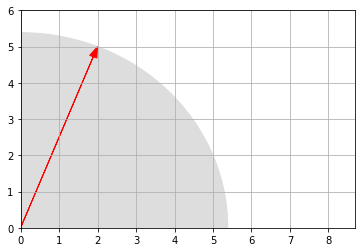

In [82]:
u = np.array([2, 5])
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

## Addition

**Vectors of same size** can be added together. Addition is performed *elementwise*:

In [83]:
u = np.array([2, 5])
v = np.array([3, 1])
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

### Geometric Interpretation of vector addition

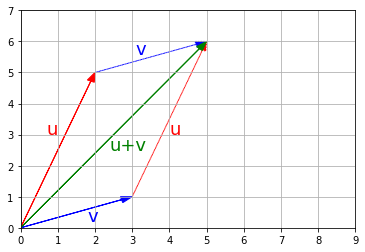

In [33]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

* Vector addition is **commutative**, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. 

* You can see it on the previous image: following $\textbf{u}$ *then* $\textbf{v}$ leads to the same point as following $\textbf{v}$ *then* $\textbf{u}$.

* Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.

### [Geometric translation](https://en.wikipedia.org/wiki/Translation_%28geometry%29):

* If you have a shape defined by a number of points (vectors), and you add a vector $\textbf{v}$ to all of these points, then **the whole shape gets shifted by $\textbf{v}$.** 


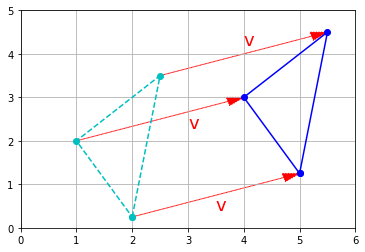

In [84]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

* Finally, subtracting a vector is like adding the opposite vector.

$$\large \textbf{u} - \textbf{v} = \textbf{u} + (-1)\times\textbf{v}$$

## Multiplication by a scalar

* Vectors can be multiplied by scalars. 
* All elements in the vector are multiplied by that number (vectorization)

For example:

In [85]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

### Geometric Interpretation of scalar-vector multiplication

* Graphically, scalar multiplication results in changing the scale of a figure
* Hence the name *scalar*. 
* The distance from the origin (the point at coordinates equal to zero) is also multiplied by the scalar. 

For example, let's scale up by a factor of `k = 3.0`:

In [127]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

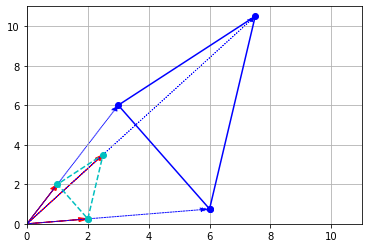

In [95]:
k = 3.0
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 11, 0, 11])
plt.grid()
plt.show()

As you might guess, dividing a vector by a scalar is equivalent to multiplying by its multiplicative inverse (reciprocal):

$$\large \dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$$

### Notes

* Scalar multiplication is **commutative**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

* It is also **associative**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

* Finally, it is **distributive** over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

## Zero, unit and normalized vectors
* A **zero-vector** is a vector full of 0s.
* A **unit vector** is a vector with a norm equal to 1.
* The **normalized vector** of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$



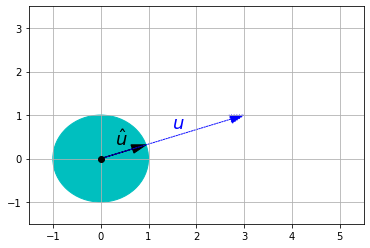

In [96]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Distance in $\mathbb{R}^n$

For $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^{n}$, the distance between $\mathbf{u}$ and $\mathbf{v},$ written as dist $(\mathbf{u}, \mathbf{v}),$ is the length of the vector $\mathbf{u}-\mathbf{v} .$ That is,

$$\large 
\operatorname{dist}(\mathbf{u}, \mathbf{v})=\|\mathbf{u}-\mathbf{v}\|
$$

Suppose we have two vectors $\mathbf{u} = (2, 9)$ and $\mathbf{v} = (-3, 4)$, compute the distance and visualize the results.

In [11]:
u = np.array([2, 9])
v = np.array([-3, 4])
np.linalg.norm(u - v)

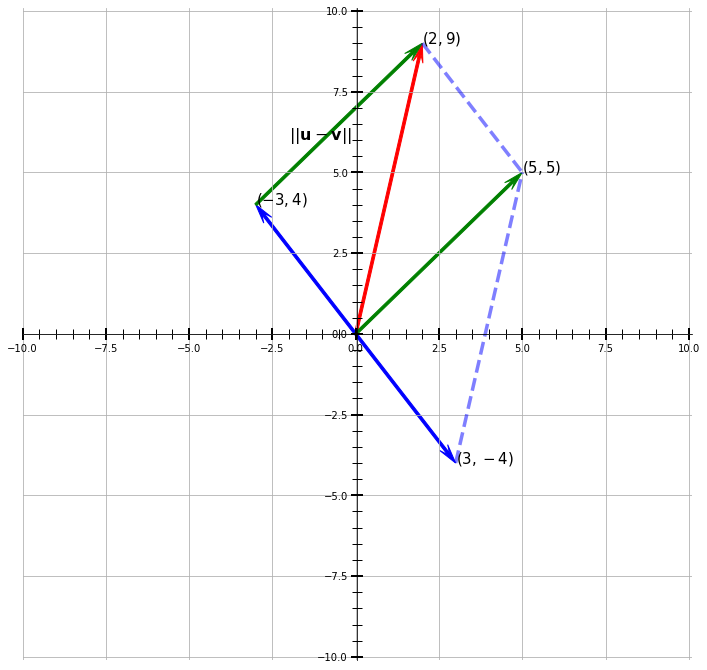

In [97]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[2, 9], [-3, 4], [3, -4], [5, 5]])
col = ['red', 'blue', 'blue', 'green']
cordt = ['$(2, 9)$', '$(-3, 4)$', '$(3, -4)$', '$(5, 5)$']

for i in range(4):
    ax.arrow(0, 0, vects[i, 0], vects[i, 1], color = col[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
ax.grid()

points = np.array([[2, 9], [5, 5], [3, -4], [-3, 4]])

ax.arrow(points[3][0], points[3][1], points[1][0], points[1][1], color = 'green', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)

line1 = np.array([points[0], points[1]])
ax.plot(line1[:,0], line1[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([points[2], points[1]])
ax.plot(line2[:,0], line2[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.text(-2, 6, '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 16)

###################### Axis, Spines, Ticks ##########################
ax.axis([-10, 10.1, -10.1, 10.1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')

From the graph, we know that the $\|\mathbf{u}-\mathbf{v}\|$ is $\sqrt{5^2 + 5^2}$.

In [98]:
np.sqrt(5**2 + 5**2)

7.0710678118654755

The same results as the ```np.linalg.norm(u - v)```.

## Orthogonal Vectors

We have two vectors $\mathbf{u}$ and $\mathbf{v}$, and square the distance of $\|\mathbf{u}+\mathbf{v}\|$ and $\|\mathbf{u}-\mathbf{v}\|$ 

$$\large \begin{aligned}
\big[\operatorname{dist}(\mathbf{u},-\mathbf{v})\big]^{2} &=\|\mathbf{u}-(-\mathbf{v})\|^{2}=\|\mathbf{u}+\mathbf{v}\|^{2} \\
&=(\mathbf{u}+\mathbf{v}) \cdot(\mathbf{u}+\mathbf{v}) \\
&=\mathbf{u} \cdot(\mathbf{u}+\mathbf{v})+\mathbf{v} \cdot(\mathbf{u}+\mathbf{v}) \\
&=\mathbf{u} \cdot \mathbf{u}+\mathbf{u} \cdot \mathbf{v}+\mathbf{v} \cdot \mathbf{u}+\mathbf{v} \cdot \mathbf{v} \\
&=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}+2 \mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

$$\large \begin{aligned}
\big[\operatorname{dist}(\mathbf{u}, \mathbf{v})\big]^{2} &=\|\mathbf{u}\|^{2}+\|-\mathbf{v}\|^{2}+2 \mathbf{u} \cdot(-\mathbf{v}) \\
&=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-2 \mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

Suppose $\mathbf{u} = (1, 4)$ and $\mathbf{v} = (-2, 2)$, visualize the vector and distances.

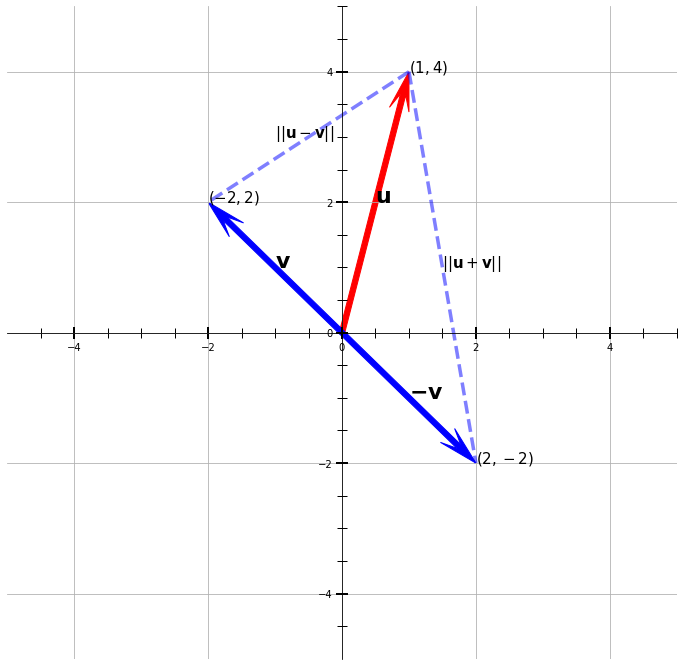

In [14]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[1, 4], [-2, 2], [2, -2]])
colr = ['red', 'blue', 'blue'] 
cordt = ['$(1, 4)$', '$(-2, 2)$', '$(2, -2)$']
vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$']

for i in range(3):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

ax.text(x = -1, y = 3, s = '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 15)    
ax.text(x = 1.5, y = 1, s = '$\|\|\mathbf{u}+\mathbf{v}\|\|$', size = 15)    



############################### Dashed Line #######################
line1 = np.array([vects[0], vects[1]])
ax.plot(line1[:,0], line1[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([vects[0], vects[2]])
ax.plot(line2[:,0], line2[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

###################### Axis, Spines, Ticks ##########################
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')

ax.axis([-5, 5, -5, 5])
ax.grid()

Note that if $\big[\operatorname{dist}(\mathbf{u},-\mathbf{v})\big]^{2} = \big[\operatorname{dist}(\mathbf{u}, \mathbf{v})\big]^{2}$, $\mathbf{u}$ and $\mathbf{v}$ are orthogonal.According to equations above, it must be 

$$\large \mathbf{u} \cdot \mathbf{v} = 0$$

This is one of the most important conclusion in linear algebra.

Suppose there is another vector $w = (2.5, 2.5)$, let's plot over the graph again.

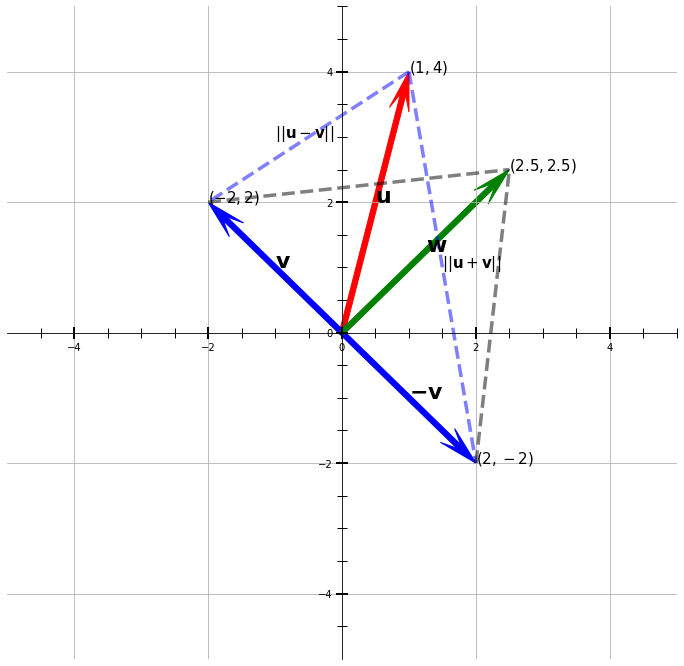

In [15]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[1, 4], [-2, 2], [2, -2], [2.5, 2.5]])
colr = ['red', 'blue', 'blue', 'green'] 
cordt = ['$(1, 4)$', '$(-2, 2)$', '$(2, -2)$', '$(2.5, 2.5)$']
vec_name = ['$\mathbf{u}$', '$\mathbf{v}$','$\mathbf{-v}$', '$\mathbf{w}$']

for i in range(4):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

ax.text(x = -1, y = 3, s = '$\|\|\mathbf{u}-\mathbf{v}\|\|$', size = 15)    
ax.text(x = 1.5, y = 1, s = '$\|\|\mathbf{u}+\mathbf{v}\|\|$', size = 15)    

############################### Dashed Line #######################

line1 = np.array([vects[0], vects[1]])
ax.plot(line1[:,0], line1[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([vects[0], vects[2]])
ax.plot(line2[:,0], line2[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

line1 = np.array([vects[1], vects[3]])
ax.plot(line1[:,0], line1[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')

line2 = np.array([vects[2], vects[3]])
ax.plot(line2[:,0], line2[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')

###################### Axis, Spines, Ticks ##########################
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')

ax.axis([-5, 5, -5, 5])
ax.grid()

Use SciPy built-in function, construct two $2\times 2$ matrices for holding head and tail coordinates of the vector.

In [99]:
a = np.array([[1, 4], [-2, 2]])
b = np.array([[1, 4], [2, -2]])

In [100]:
distance = sp.spatial.distance.pdist(a, 'euclidean'); distance

array([3.60555128])

In [101]:
distance = sp.spatial.distance.pdist(b, 'euclidean');distance

array([6.08276253])

Verify by NumPy ```.norm```.

In [102]:
def dist(u, v):
    a = np.linalg.norm(u - v)
    return a

In [103]:
u = np.array([1, 4])
v = np.array([-2, 2])
dist(u, v)

3.605551275463989

In [104]:
u = np.array([1, 4])
v = np.array([2, -2])
dist(u, v)

6.082762530298219

Now Let's test if vector $(2.5, 2.5)^T$ is perpendicular to $(2, -2)^T$ and $(-2, 2)^T$.

In [105]:
a = np.array([[2.5, 2.5], [-2, 2]])
b = np.array([[2.5, 2.5], [2, -2]])
distance1 = sp.spatial.distance.pdist(a, 'euclidean')
distance2 = sp.spatial.distance.pdist(b, 'euclidean')

In [106]:
print(distance1, distance2)

[4.52769257] [4.52769257]


They are the same length, which means $\mathbf{w}\perp \mathbf{v}$ and $\mathbf{w}\perp \mathbf{-v}$.

## Angles in $\mathbb{R}^n$

There is one formula of calculating angles in vector space, to derive it we need the law of cosine:

$$\large \|\mathbf{u}-\mathbf{v}\|^{2}=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-2\|\mathbf{u}\|\|\mathbf{v}\| \cos \theta$$

The formula can also be derived using a little geometry and simple algebra. From the diagram,

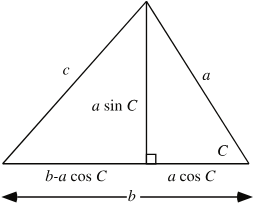

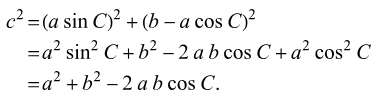

Rearrange, we get

$$\large \begin{aligned}
\|\mathbf{u}\|\|\mathbf{v}\| \cos \theta &=\frac{1}{2}\left[\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-\|\mathbf{u}-\mathbf{v}\|^{2}\right] \\
&=\frac{1}{2}\left[u_{1}^{2}+u_{2}^{2}+v_{1}^{2}+v_{2}^{2}-\left(u_{1}-v_{1}\right)^{2}-\left(u_{2}-v_{2}\right)^{2}\right] \\
&=u_{1} v_{1}+u_{2} v_{2} \\
&=\mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

In statistics, $\cos{\vartheta}$ is called <font face="gotham" color="red"> correlation coefficient </font>.

$$\large 
\cos{\theta}=\frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\|\|\mathbf{v}\|}
$$

### Calculating the angle between vectors

* One of the many uses of the dot product is to calculate the angle between two non-zero vectors. 
* Looking at the dot product definition, we can deduce the following formula:

$$\large \theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$$

* Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. 
* In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [108]:
u, v

(array([1, 4]), array([ 2, -2]))

In [107]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 2.1112158270654806 radians
      = 120.96375653207352 degrees


### Note: 

* due to small floating point errors, `cos_theta` may be very slightly outside of the $[-1, 1]$ interval, which would make `arccos` fail. 
* This is why we clipped the value within the range, using NumPy's `clip` function.

###  Inner Product and its variants: Cosine similarity vs Pearson correlation

* You have two vectors $u$ and $v$, and want to measure similarity between them. 
* The inner product serves a basic similarity function: 
    - If $u$ tends to be high where $v$ is also high, and low where $v$ is low, the inner product will be higher because you maximize the impact of the high values and minimize the impact of low values — the vectors are more similar.
    - The inner product is unbounded. One way to make it bounded between -1 and 1 is to divide by the vectors’ L2 norms, giving the cosine similarity
    
    $$\large cos{\theta}=cos(u,v) = \frac{\sum_i u_i v_i}{ \sqrt{ \sum_i u_i^2} \sqrt{ \sum_i v_i^2 } } 
= \frac{ \mathbf{u} \cdot \mathbf{v}}{ ||\mathbf{u}||\ ||\mathbf{v}|| }$$

    - This is actually bounded between 0 and 1 if $u$ and $v$ are non-negative. Cosine similarity has an interpretation as the cosine of the angle between the two vectors.
    - Cosine similarity is not invariant to shifts. If $u$ was shifted to $u+1$, the cosine similarity would change.
    - To make the similarity invariant to shifts, we have Pearson correlation.
    
    $$\large \begin{align} 
corr(u, v) &= \frac{ \sum_i (u_i-\bar{u}) (v_i-\bar{v}) }{ 
\sqrt{\sum (u_i-\bar{u})^2} \sqrt{ \sum (v_i-\bar{v})^2 } } 
\\ 
& = \frac{ (u-\bar{u}) \cdot (v-\bar{v})}{ 
||u-\bar{u}||\ ||v-\bar{v}||}  \\ 
& = cos(u-\bar{u}, v-\bar{v}) 
\end{align}$$
    
### Summary  
* Inner product is a basic version of silimarity and unbounded.
  
* Cosine similarity and Pearson correlations can be viewed as variants on the inner product — tweaked in different ways for centering and magnitude.

* Correlation is the cosine similarity between centered versions of $u$ and $v$, again bounded between -1 and 1

* Unlike the cosine, the correlation is invariant to both scale and location changes of x and y.

## Geometric Interpretation of Dot Product

* You probably have notices that sometimes <i>dot product</i> and <i>inner product</i> are used interchangeably. 
* Despite that, they do have different meanings. 

* Functions and polynomials can have inner product as well, 
* but we usually **use dot product to refer to inner product among vector space.**

### We will show that dot product has an interesting geometric interpretation.

* Consider two vectors $\mathbf{a}$ and $\mathbf{u}$, pointing different direction, the angle form by them is $\theta$, 
* also $\mathbf{u}$ is a unit vector. 
* We would like to know how much $\mathbf{a}$ is pointing to $\mathbf{u}$'s direction.

And this value can be calculated by projecting $\mathbf{a}$ onto $\mathbf{u}$,

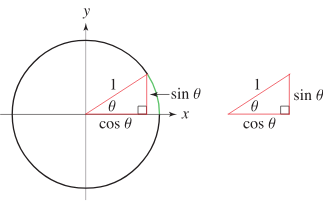

$$\large 
 \|\mathbf{a}\|\cos{\theta}=\|\mathbf{a}\| \|\mathbf{u}\|\cos{\theta} = \mathbf{a} \cdot\mathbf{u} 
$$

Any vector $\mathbf{b}$ can be normalized as a unit vector $\mathbf{u}$, then perform the calculation above, we can tell how much $\mathbf{b}$ is pointing the direction of $\mathbf{u}$.

## Orthogonal Projection

For any $\mathbf{y}$ in $\mathbb{R}^n$, we want to decompose it as 

$$\large 
\mathbf{y} = \alpha \mathbf{u}+\mathbf{z} = \hat{\mathbf{y}}+\mathbf{z}
$$

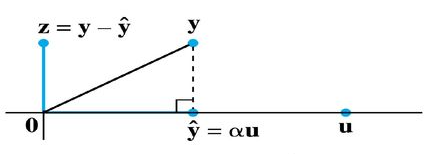

where 

* $ \mathbf{u}$ is perpendicular to $\mathbf{z}$, 
* $\alpha$ is a scalar.
* **The goal:** Finding $\alpha$ to make $\mathbf{y}- \hat{\mathbf{y}}$ orthogonal to $ \mathbf{u}$.
* And the subspace $L$ spanned by $\mathbf{u}$, the projection of $\mathbf{y}$ onto $L$ is denoted as

$$\large \hat{\mathbf{y}}=\operatorname{proj}_{L} \mathbf{y}=\frac{\mathbf{y} \cdot \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} \mathbf{u}$$

**It is easy to prove:**

Becasue $\mathbf{u}\perp \mathbf{z}$, then $\mathbf{u}\cdot \mathbf{z} = 0$, replace $\mathbf{z}$ by $\mathbf{y}- \alpha \mathbf{u}$:

$$\large
(\mathbf{y}- \alpha \mathbf{u})\cdot \mathbf{u}= 0$$

$$\large \alpha = \frac{\mathbf{y}\cdot \mathbf{u}}{\mathbf{u}\cdot \mathbf{u}}
$$

Now we get the formula for projection onto $L$ spanned by $\mathbf{u}$.

### A Visual Example in $\mathbb{R}^T$

Suppose we have $\mathbf{y} = (2, 5)^T$, $\mathbf{u} = (3, 1)^T$. Plot $\hat{\mathbf{y}}$ onto the subspace spanned $L$ by $\mathbf{u}$.

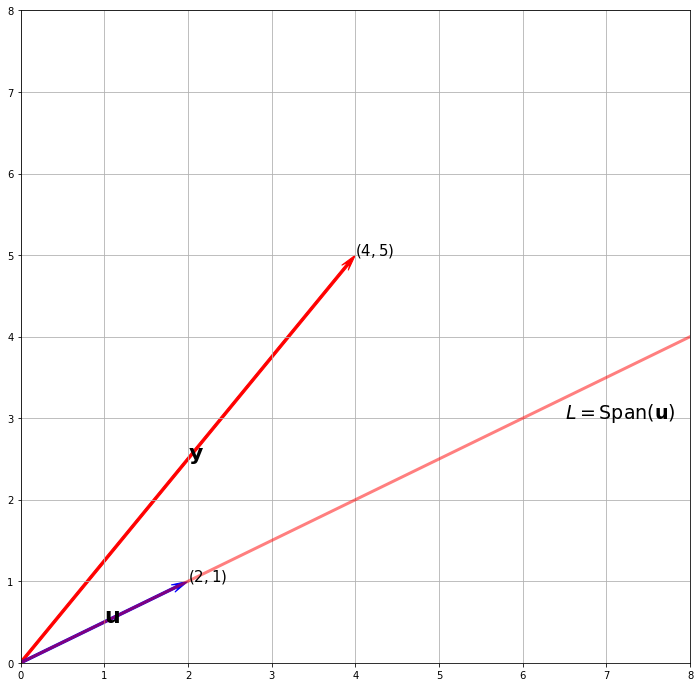

In [109]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[4, 5], [2, 1]])
colr = ['red', 'blue'] 
cordt = ['$(4, 5)$', '$(2, 1)$']
vec_name = ['$\mathbf{y}$', '$\mathbf{u}$']

for i in range(2):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .03, 
             length_includes_head = True,
             head_width = .1, # default: 3*width
             head_length = .2,
             overhang = .4)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 15)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

################################### Subspace L ############################
x = np.linspace(0, 8.1)
y = 1/2*x
ax.plot(x, y, lw = 3, color = 'red', alpha = .5)
ax.text(x = 6.5, y = 3, s = '$L = \operatorname{Span(\mathbf{u})}$', size = 19)

ax.axis([0, 8, 0, 8])
ax.grid()

Let's use formula to compute $\alpha$ and $\hat{\mathbf{y}}$.

In [110]:
y = np.array([4, 5])
u = np.array([2, 1])
alpha = (y@u)/(u@u);alpha

2.6

In [111]:
yhat = alpha*u;yhat

array([5.2, 2.6])

With results above, we can plot the orthogonal projection.

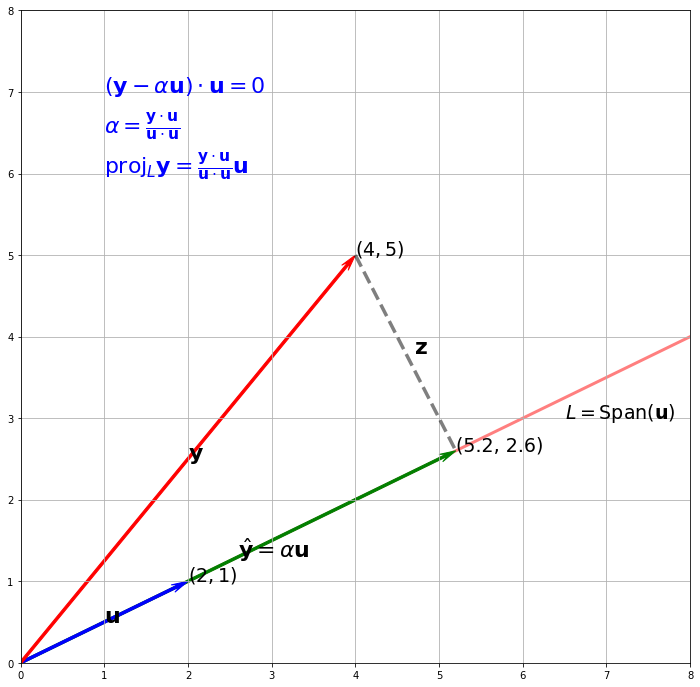

In [112]:
fig, ax = plt.subplots(figsize = (12, 12))

vects = np.array([[4, 5], [2, 1], [5.2, 2.6]])
colr = ['red', 'blue', 'green'] 
cordt = ['$(4, 5)$', '$(2, 1)$', '(5.2, 2.6)']
vec_name = ['$\mathbf{y}$', '$\mathbf{u}$', r'$\hat{\mathbf{y}} = \alpha\mathbf{u}$']

for i in range(3):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color = colr[i], width = .03, 
             length_includes_head = True,
             head_width = .1, # default: 3*width
             head_length = .2,
             overhang = .4, zorder = -i)
    ax.text(x = vects[i][0], y = vects[i][1], s = cordt[i], size = 19)
    ax.text(x = vects[i][0]/2, y = vects[i][1]/2, s = vec_name[i], size = 22)

##################################### Components of y orthogonal to u ##########################

point1 = [4, 5]
point2 = [5.2, 2.6]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], c = 'k', lw = 3.5,alpha =0.5, ls = '--')
ax.text(4.7, 3.8, '$\mathbf{z}$', size = 22)
################################### Subspace L ############################
x = np.linspace(0, 8.1)
y = 1/2*x
ax.plot(x, y, lw = 3, color = 'red', alpha = .5, zorder = -3)
ax.text(x = 6.5, y = 3, s = '$L = \operatorname{Span(\mathbf{u})}$', size = 19)

ax.axis([0, 8, 0, 8])
ax.grid()

#################################### Formula ################################
ax.text(x = 1, y = 7, 
        s = r'$(\mathbf{y}- \alpha \mathbf{u})\cdot \mathbf{u}= 0$',
        size = 22, color = 'b')
ax.text(x = 1, y = 6.5, 
        s = r'$\alpha = \frac{\mathbf{y}\cdot \mathbf{u}}{\mathbf{u}\cdot \mathbf{u}}$',
        size = 22, color = 'b')
ax.text(x = 1, y = 6, 
        s = r'$\operatorname{proj}_{L}\mathbf{y}=\frac{\mathbf{y}\cdot\mathbf{u}}{\mathbf{u}\cdot\mathbf{u}}\mathbf{u}$',
        size = 22, color = 'b')
plt.show()

## notes

Orthogonal projection is a cornerstone of vector space methods, with many diverse applications.

These include, but are not limited to,

- Least squares projection, also known as linear regression  
- Conditional expectations for multivariate normal (Gaussian) distributions  
- Gram–Schmidt orthogonalization  
- QR decomposition  
- Orthogonal polynomials  
- etc  

### Another example in 3D:

In [116]:
import numpy as np
  
y = np.array([1, 2, 3])   # vector y
u = np.array([5, 6, 2])   # vector u:
  
# Task: Project vector y on vector u
  
# finding norm of the vector u
u_norm = np.sqrt(sum(u**2))    
  
# Apply the formula as mentioned above
# for projecting a vector onto another vector
# find dot product using np.dot()
proj_of_y_on_u = (np.dot(y, u)/u_norm**2)*u
  
print("Projection of Vector y on Vector u is: ", proj_of_y_on_u)

Projection of Vector y on Vector u is:  [1.76923077 2.12307692 0.70769231]


* or you can write into one line

In [117]:
(np.dot(y, u)/np.dot(u, u))*u

array([1.76923077, 2.12307692, 0.70769231])

## Geometric view of matrix

* Vectors can be represented as points or arrows in N-dimensional space. 
* A matrix as a list of vectors, so plotting a matrix results in many points or arrows. 

For example, let's create a $2 \times 4$ matrix `P` and plot it as points:

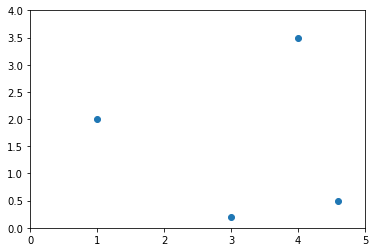

In [118]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

### Notes

* Of course we could also have stored the same 4 vectors as row vectors instead of column vectors, resulting in a $4 \times 2$ matrix (the transpose of $P$, in fact). It is really an arbitrary choice.

* Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

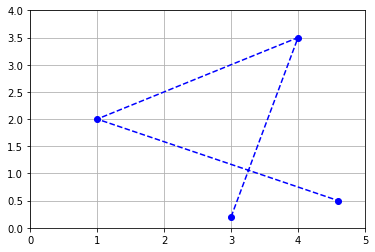

In [119]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

* Or you can represent it as a polygon

* **A little technical trick:** matplotlib's `Polygon` class expects an $n \times 2$ NumPy array, not a $2 \times n$ array, so we just need to give it $P^T$:

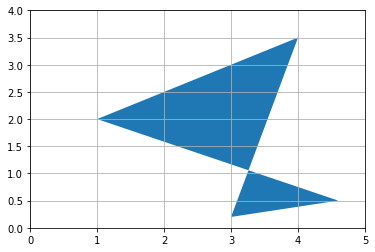

In [42]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

## Geometric applications of matrix operations

* vector addition results in a geometric translation
* vector multiplication by a scalar results in rescaling (zooming in or out, centered on the origin)
* vector dot product results in projecting a vector onto another vector, rescaling and measuring the resulting coordinate.

Similarly, matrix operations have very useful geometric applications.

### Addition = multiple geometric translations
First, adding two matrices together is equivalent to adding all their vectors together. 

For example, let's create a $2 \times 4$ matrix $H$ and add it to $P$, and look at the result:

In [120]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

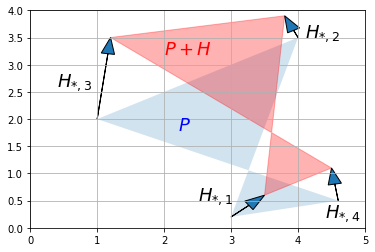

In [121]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

If we add a matrix full of identical vectors, we get a simple geometric translation:

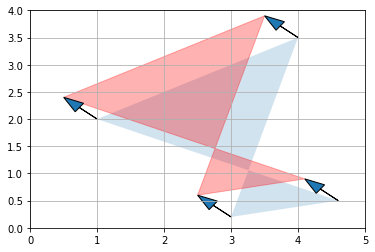

In [122]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

### Technical trick:

* Although matrices can only be added together if they have the same size, NumPy allows adding a row vector or a column vector to a matrix
* this is called *broadcasting* and is explained in previous class. 
* So we could have obtained the same result as above with:

In [123]:
P + [[-0.5], [0.4]]  # same as P + H2, thanks to NumPy broadcasting

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

### Scalar multiplication

* Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, 
* so unsurprisingly, the geometric result is a rescaling of the entire figure. 

For example, let's rescale our polygon by a factor of 60% (zooming out, centered on the origin):

Question: by what factor is the grey area size recaled?

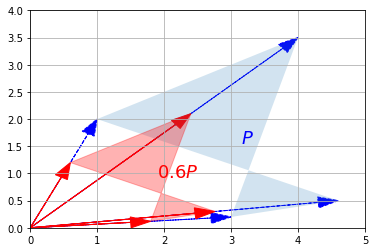

In [125]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

### Matrix multiplication – Projection onto an axis

* Matrix multiplication is more complex to visualize.

Let's start simple, by defining a $1 \times 2$ matrix $U = \begin{bmatrix} 1 & 0 \end{bmatrix}$. This row vector is just the horizontal unit vector.

In [47]:
U = np.array([[1, 0]])

Now let's look at the dot product $U \cdot P$:

In [56]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

In [48]:
U.dot(P)

array([[3. , 4. , 1. , 4.6]])

* These are the horizontal coordinates of the vectors in $P$. 
* In other words, we just projected $P$ onto the horizontal axis:

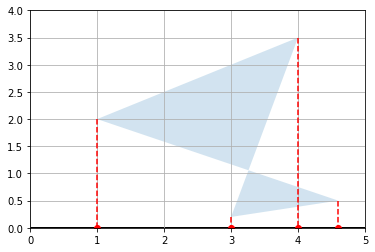

In [126]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

### More generally on any axis

* We can actually project on any other axis by just replacing $U$ with any other unit vector. 
* For example, let's project on the axis that is at a 30° angle above the horizontal axis:

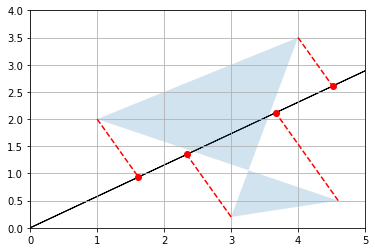

In [50]:
angle30 = 30 * np.pi / 180  # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)

### Notes

* The dot product of a unit vector and a matrix basically performs a projection on an axis 
* Gives us the coordinates of the resulting points on that axis.

### Matrix multiplication – Rotation

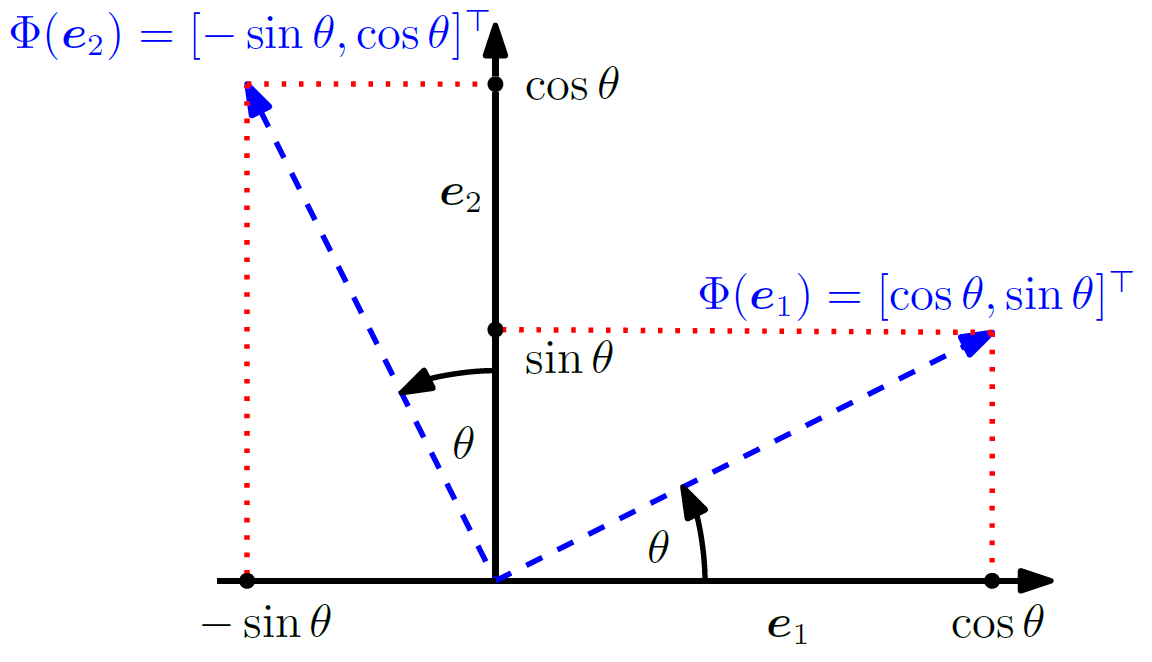

Now let's create a $2 \times 2$ matrix $V$ containing two unit vectors that make 30° and 120° angles with the horizontal axis:

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}=\begin{bmatrix} \cos(30°) & \sin(30°) \\ -\sin(30°) & \cos(30°) \end{bmatrix}$

In [66]:
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [-np.sin(angle30), np.cos(angle30)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [63]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [64]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

Let's look at the product $VP$:

In [65]:
V.dot(P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

### Projection interpretation of matrix multiplication

* The first row is equal to $V_{1,*} P$, which is the coordinates of the projection of $P$ onto the 30° axis, as we have seen above. 
* The second row is $V_{2,*} P$, which is the coordinates of the projection of $P$ onto the 120° axis. 

* So basically we obtained the coordinates of $P$ after rotating the horizontal and vertical axes by 30° (or equivalently after rotating the polygon by -30° **around the origin**)! 

Let's plot $VP$ to see this:

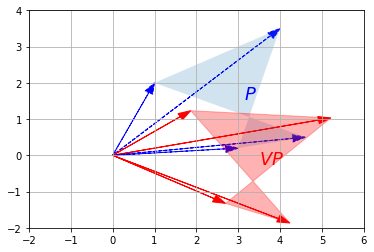

In [59]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

Matrix $V$ is called a **rotation matrix**.

### Lab exercise of today

1. Find the projection of x on y, and the projection of y on x. Do they have the same length? In what condition will they be same?

```
x = np.array([ 3, -4,  0])
y = np.array([10,  5, -6])
```

2. Find the angle of x and y, and the angle of the two projections. Are the two angles same? 
3. Use linear algebra to prove the two conclusions above.